# Session 1: Introduction to Data Analysis

Python provides very intutive and powerful tools for data analysis. 

The `Pandas` library is the most

In this lesson, we'll learn the concepts and see how to apply those to get insights from the data.

Let's start with importing the modules that we are going to use.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [2]:
# show graphs in the notebooks and some config to make to look better
plt.rcParams['figure.figsize'] = (8,4)
plt.style.use('ggplot')

%matplotlib inline

## A taste of data analysis

Let's get a taste of data analysis by exploring a small dataset from the United Nations, with data for most of the counties in the world.

In [3]:
import pandas as pd

In [4]:
# read the data 
df = pd.read_csv("data/un-min.csv")

In [5]:
# Look at the first 5 rows
df.head()

,country,region,lifeMale,lifeFemale,infantMortality,GDPperCapita
0,Afghanistan,Asia,45.0,46.0,154,2848
1,Albania,Europe,68.0,74.0,32,863
2,Algeria,Africa,67.5,70.3,44,1531
3,Angola,Africa,44.9,48.1,124,355
4,Argentina,America,69.6,76.8,22,8055


Make the country as row index.

In [6]:
df.set_index("country", inplace=True)

In [7]:
df.head()

,region,lifeMale,lifeFemale,infantMortality,GDPperCapita
country,,,,,
Afghanistan,Asia,45.0,46.0,154,2848
Albania,Europe,68.0,74.0,32,863
Algeria,Africa,67.5,70.3,44,1531
Angola,Africa,44.9,48.1,124,355
Argentina,America,69.6,76.8,22,8055


What does the data say?

In [8]:
df.describe()

,lifeMale,lifeFemale,infantMortality,GDPperCapita
count,188.000000,188.000000,188.000000,188.000000
mean,63.526064,68.309043,44.308511,5890.595745
std,9.820235,11.085095,38.896964,8917.273130
min,36.000000,39.100000,3.000000,36.000000
25%,57.275000,58.625000,12.000000,426.500000
50%,66.500000,71.950000,30.500000,1654.500000
75%,70.675000,76.250000,71.250000,6730.500000
max,77.400000,82.900000,169.000000,42416.000000


How many countries are there?

In [9]:
len(df)

188

What are the top-5 richest counties?

In [10]:
df.sort_values("GDPperCapita", ascending=False).head()

,region,lifeMale,lifeFemale,infantMortality,GDPperCapita
country,,,,,
Switzerland,Europe,75.3,81.8,5,42416
Japan,Asia,76.9,82.9,4,41718
Luxembourg,Europe,73.1,79.7,6,35109
Norway,Europe,74.8,80.6,5,33734
Denmark,Europe,73.0,78.3,7,33191


How is the wealth distribued across the countries in the world? Are more rich countries or poor? 

<Axes: >

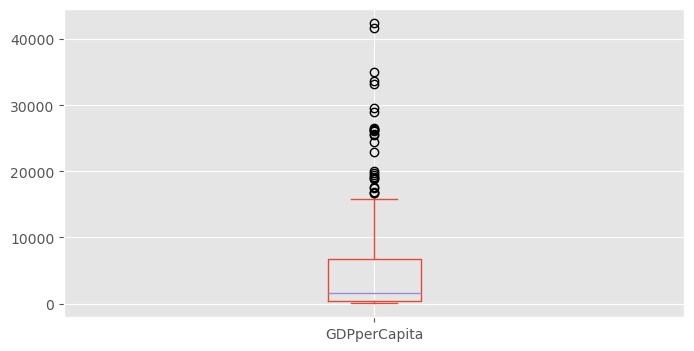

In [11]:
df.GDPperCapita.plot(kind="box")

<Axes: >

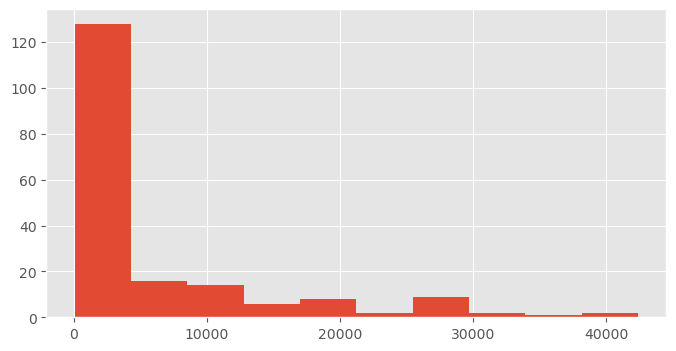

In [12]:
df.GDPperCapita.hist()

How healthy is the world? Let's use infant mortality as a measure to identify that.

Infant Mortality is the number of deaths of infants under one year of age per 1,000 live births. 

In [13]:
df.infantMortality.describe()

count    188.000000
mean      44.308511
std       38.896964
min        3.000000
25%       12.000000
50%       30.500000
75%       71.250000
max      169.000000
Name: infantMortality, dtype: float64

Half of the countries has infant mortality 30 or less. Remaining half has it more than 30 and in the worst case, it is as high as 169.

Let's see that visually.

<Axes: >

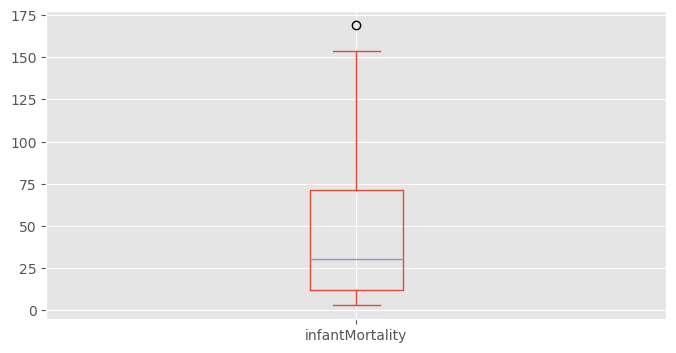

In [14]:
df.infantMortality.plot(kind="box")

Does money brings health?

<Axes: xlabel='GDPperCapita', ylabel='infantMortality'>

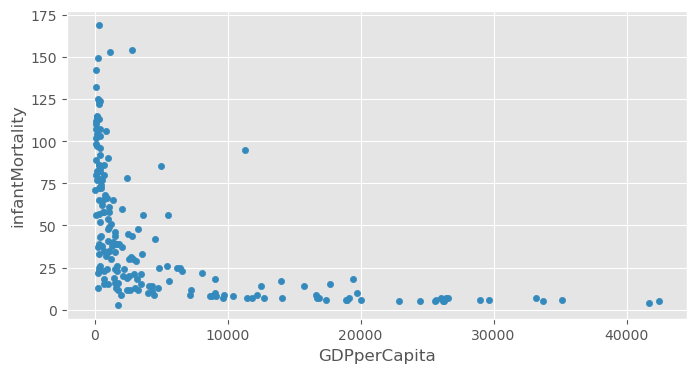

In [15]:
df.plot(kind="scatter", x="GDPperCapita", y="infantMortality")

It looks like so. As the GDP of the counties increases, the infant mortality seems to be decreasing. Of course, there are some outliers.

Can we summarize the data by continent?

In [16]:
df.groupby("region").mean()

,lifeMale,lifeFemale,infantMortality,GDPperCapita
region,,,,
Africa,52.052830,55.286792,86.320755,1217.641509
America,69.082857,74.474286,26.657143,5080.085714
Asia,65.373913,69.439130,43.782609,5453.195652
Europe,70.362500,77.545000,11.575000,12860.050000
Oceania,67.464286,72.092857,24.642857,7131.785714


In [17]:
df_region = df.groupby("region").mean()

<Axes: ylabel='region'>

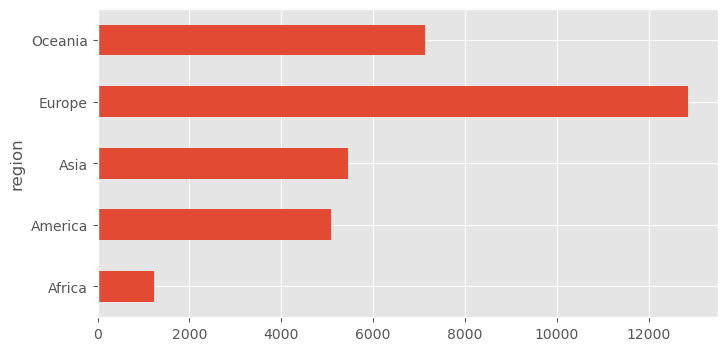

In [18]:
df_region.GDPperCapita.plot(kind="barh")

<Axes: ylabel='region'>

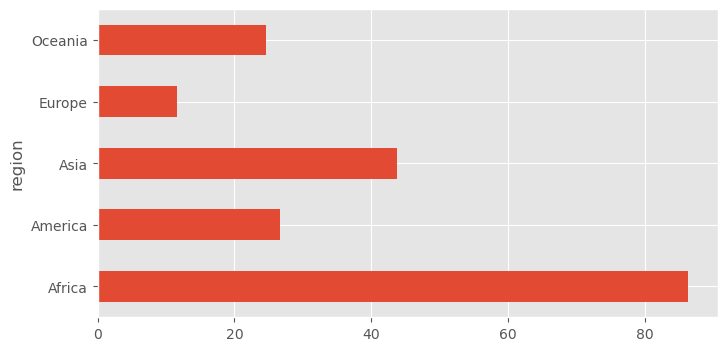

In [19]:
df_region.infantMortality.plot(kind="barh")

What is the worst country to born in if you are a male?

In [20]:
df.sort_values("lifeMale").head()

,region,lifeMale,lifeFemale,infantMortality,GDPperCapita
country,,,,,
Sierra.Leone,Africa,36.0,39.1,169,293
Malawi,Africa,40.3,41.1,142,142
Uganda,Africa,40.4,42.3,113,305
Rwanda,Africa,40.8,43.4,125,238
Zambia,Africa,42.2,43.7,103,382


In [21]:
df.sort_values("lifeFemale").head()

,region,lifeMale,lifeFemale,infantMortality,GDPperCapita
country,,,,,
Sierra.Leone,Africa,36.0,39.1,169,293
Malawi,Africa,40.3,41.1,142,142
Uganda,Africa,40.4,42.3,113,305
Rwanda,Africa,40.8,43.4,125,238
Zambia,Africa,42.2,43.7,103,382


Which countries have bigger difference between life expectency of male and female?

In [22]:
df['lifeRatio'] = df.lifeMale/df.lifeFemale

In [23]:
df.head()

,region,lifeMale,lifeFemale,infantMortality,GDPperCapita,lifeRatio
country,,,,,,
Afghanistan,Asia,45.0,46.0,154,2848,0.978261
Albania,Europe,68.0,74.0,32,863,0.918919
Algeria,Africa,67.5,70.3,44,1531,0.960171
Angola,Africa,44.9,48.1,124,355,0.933472
Argentina,America,69.6,76.8,22,8055,0.906250


In [24]:
df.sort_values("lifeRatio").head()

,region,lifeMale,lifeFemale,infantMortality,GDPperCapita,lifeRatio
country,,,,,,
Russia,Europe,58.0,71.5,19,2451,0.811189
Latvia,Europe,62.5,74.3,16,1764,0.841184
Estonia,Europe,63.9,75.0,12,2433,0.852000
Lithuania,Europe,64.9,76.0,13,1595,0.853947
Ukraine,Europe,63.6,74.0,18,694,0.859459


In [25]:
df.sort_values("lifeRatio").tail()

,region,lifeMale,lifeFemale,infantMortality,GDPperCapita,lifeRatio
country,,,,,,
Yemen,Asia,57.4,58.4,80,732,0.982877
India,Asia,62.1,62.7,72,365,0.990431
Bangladesh,Asia,58.1,58.2,78,280,0.998282
Nepal,Asia,57.6,57.1,82,203,1.008757
Maldives,Asia,65.7,63.3,49,1079,1.037915


Data can tell us very interesting stories if we know how to dig into it. Pandas is a wonderful tool for data exploration.

While pandas is the most commonly used library for data exploration, a lot of its operations are are based on Numpy, a numerical computation library. It will be very helpful to understand how to do vector operations in Numpy so that we can use Pandas very effectively.

## Numpy

Numpy is the numerical computation library in Python and this is the basis for most scientific computing and data science tools in Python. It is not only a building block, but many of these tools inherit the API of numpy for vector operatons and data selection. Understanding numpy closely helps us to use those tools better.

While you may not deal with numpy array directly, this knowledge will be useful in working with most data analysis tools in Python.

In this section, we'll learn about the following things about numpy arrays:

- creation of multi-dimentional arrays 
- reshaping them
- vector operations
- indexing

In [26]:
import numpy as np

Numpy is a libray that provide a multi-dimentional array interface, with very elegant API.

Let's start with creating a simple 1-dimentional array. Unlike lists in Python, all the elements of a numpy array will be of the same type.

In [27]:
x = np.array([1, 2, 3, 4, 5])

In [28]:
x

array([1, 2, 3, 4, 5])

In [29]:
x.shape

(5,)

In [30]:
x.dtype

dtype('int64')

Every array in numpy has a `dtype` and a `shape`. The `dtype` indicates the datatype of each element in the array and shape indicates the length of the array in each dimension as a tuple.

In [31]:
x = np.array([0.1, 0.2, 0.3])

In [32]:
x.dtype

dtype('float64')

In [33]:
# create a float64 array with given numbers
x = np.array([1, 2, 3, 4], dtype=np.float64)

In [34]:
x

array([1., 2., 3., 4.])

In [35]:
x.dtype

dtype('float64')

We can create a two dimentional array as well.

In [36]:
d = np.array([
    [1, 2, 3],
    [4, 5, 6]])

In [37]:
d

array([[1, 2, 3],
       [4, 5, 6]])

In [38]:
d.shape

(2, 3)

In [39]:
d.dtype

dtype('int64')

### Utilties for creating arrays

Numpy provides some utilities for creating arrays.

Create an array of zeros.

In [40]:
np.zeros(4)

array([0., 0., 0., 0.])

In [41]:
np.zeros((2, 4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [42]:
# create a 1-d array of size 6 and reshape it as 2x3
np.zeros(6).reshape(2, 3)

array([[0., 0., 0.],
       [0., 0., 0.]])

In [43]:
# create a 1-d array of size 24 and reshape it as 2x3x4
np.zeros(24).reshape(2, 3, 4)

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]])

In [44]:
x = np.zeros(6).reshape(2, 3)

In [45]:
x

array([[0., 0., 0.],
       [0., 0., 0.]])

In [46]:
x[0]

array([0., 0., 0.])

In [47]:
x[1]

array([0., 0., 0.])

In [48]:
y = np.zeros(24).reshape(2, 3, 4)

In [49]:
len(y)

2

In [50]:
y.shape

(2, 3, 4)

In [51]:
y[0]

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [52]:
y[1]

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [53]:
len(y[0])

3

In [54]:
len(y[0][0])

4

In [55]:
y[0, 0]

array([0., 0., 0., 0.])

In [56]:
y = np.array(range(24)).reshape((2, 3, 4))

In [57]:
y

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [58]:
y[0]

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [59]:
y[1]

array([[12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [60]:
y[0, 1]

array([4, 5, 6, 7])

In [61]:
y[1, 1]

array([16, 17, 18, 19])

In [62]:
y[1, 1, 2]

18

In [63]:
z = np.array([1, 2, 3, 4, 5, 6]).reshape(2, 3)

In [64]:
z

array([[1, 2, 3],
       [4, 5, 6]])

In [65]:
z[1, 2]

6

In [66]:
z.shape

(2, 3)

You can also create an array of ones.

In [67]:
np.ones(10)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

Or a range of numbers using `np.arange` which works like `range`, but returns a numpy array.

In [68]:
np.arange(6)

array([0, 1, 2, 3, 4, 5])

In [69]:
np.arange(1, 2, 0.1)

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9])

In [70]:
np.arange(1, 2, 0.1).reshape(2, 5)

array([[1. , 1.1, 1.2, 1.3, 1.4],
       [1.5, 1.6, 1.7, 1.8, 1.9]])

#### Problem: Create a 3-d numpy array

Create a numpy array of shape (5, 4, 3) with all zeros.

In [71]:
5*4*3

60

In [74]:
np.zeros(60).reshape((5, 4, 3))

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

### Vector operations

The most interesting part of numpy arrays is the vector operations.

In [75]:
x = np.arange(5)

In [76]:
x

array([0, 1, 2, 3, 4])

When we use arthemetic operations on numpy arrays, those operations work on each element. 

In [77]:
x + 10

array([10, 11, 12, 13, 14])

In [78]:
x * 2

array([0, 2, 4, 6, 8])

In [79]:
x * x

array([ 0,  1,  4,  9, 16])

In [80]:
x ** x

array([  1,   1,   4,  27, 256])

In [81]:
2 * x / 3

array([0.        , 0.66666667, 1.33333333, 2.        , 2.66666667])

In [82]:
A = np.arange(6).reshape(2, 3)

In [83]:
A

array([[0, 1, 2],
       [3, 4, 5]])

In [84]:
A + 10

array([[10, 11, 12],
       [13, 14, 15]])

In [85]:
x = np.arange(3)
y = np.arange(10, 13)

In [86]:
x

array([0, 1, 2])

How to compute sum of squares of all numbers below one million?

In [87]:
y

array([10, 11, 12])

In [88]:
x + y

array([10, 12, 14])

In [89]:
x = np.arange(1000000)
np.sum(x*x)

333332833333500000

Numpy is high-performance. The core computation engine is written in C language.

In [95]:
x = np.arange(1000000)

In [96]:
%%timeit
np.sum(x*x)

1.92 ms ± 213 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


Compare the same with the simple python implementation.

In [92]:
x = range(1000000)

In [93]:
%%timeit
sum([i * i for i in x])

100 ms ± 3.46 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Notice that numpy is about 50X faster than the pure python version in this case.

```{note}
The `timeit` is a jupyterlab magic command to find the time taken to execute a block of code.

It executes the block of code multiple times and reports the mean time along with standard deviation across runs.
```

#### Example: Computing Euclidian Distance

Euclidian distance between two vectors is defines as:
    

$E(p,q) = \sqrt{\Sigma_{i=1}^{n}{(p_{i}-q_{i})^2}}$


Write a function `euclidian_distance` to compute the euclidian distance between two vectors specified as numpy arrays.


In [97]:
def euclidian_distance(p, q):
    d = p-q
    total = np.sum(d*d)
    return np.sqrt(total)

In [98]:
p = np.array([1.0, 2.0, 3.0])
q = np.array([4.0, 5.0, 6.0])

In [99]:
euclidian_distance(p, q)

5.196152422706632

In [101]:
p-q

array([-3., -3., -3.])

In [102]:
d = p-q
d

array([-3., -3., -3.])

In [103]:
d*d

array([9., 9., 9.])

In [104]:
np.sum(d*d)

27.0

In [105]:
np.sqrt(np.sum(d*d))

5.196152422706632

In [ ]:
np.sqrt(3*3 + 3*3 + 3*3)

In [107]:
euclidian_distance(p, q)

5.196152422706632

#### Problem: Manhattan Distance

Write a function `manhattan_distance` to compute the manhattan distance between two vectors.

The manhattan distance is defined as:

    
$M(p,q) = \Sigma_{i=1}^{n}{|pi−qi|}$

For more info see: <https://en.wikipedia.org/wiki/Taxicab_geometry>


```
>>> manhanttan_distance(np.array([0,0]), np.array([3, 4]))
7
```

Hint: See [numpy.abs][].

[numpy.abs]: https://numpy.org/doc/stable/reference/generated/numpy.absolute.html



In [ ]:
%load_problem numpy-manhattan-distance

In [ ]:
# your code here





In [108]:
# your code here

def manhattan_distance(p, q):
    return np.abs(p-q).sum()


In [109]:
manhattan_distance(np.array([0,0]), np.array([3, 4]))

7

In [110]:
%verify_problem numpy-manhattan-distance

✓ manhattan_distance(np.array([0,0]), np.array([3, 4]))
✓ manhattan_distance(np.array([1,8]), np.array([3, 4]))
✓ manhattan_distance(p, q)
🎉 Congratulations! You have successfully solved problem numpy-manhattan-distance!!


### Indexing and Slicing

Numpy provides interesting ways to select individual elements and parts of the array to enable operations on a subset of an array. 

In the following examples, we are going to use the variable `x` for 1-d array and variable `d` for a 2-d array.

In [111]:
x = np.arange(1, 5, 0.5, dtype=np.float64)

In [112]:
x

array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

In [113]:
d = x.reshape(2, 4)

In [114]:
d

array([[1. , 1.5, 2. , 2.5],
       [3. , 3.5, 4. , 4.5]])

We can access elements from a 1-d array just like a list.

In [115]:
x[0]

1.0

In [116]:
x[1]

1.5

When dealing with multi-dimentional arrays, we can specify a value for each dimension.

In [117]:
d

array([[1. , 1.5, 2. , 2.5],
       [3. , 3.5, 4. , 4.5]])

In [118]:
d[0]

array([1. , 1.5, 2. , 2.5])

In [119]:
d[0][0]

1.0

In [120]:
d[0, 0]

1.0

In [121]:
d[0, 1]

1.5

In [122]:
d[1, 3]

4.5

We can also slice numpy arrays.

In [123]:
x

array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

In [124]:
x[:4]

array([1. , 1.5, 2. , 2.5])

In [125]:
x[4:]

array([3. , 3.5, 4. , 4.5])

In [127]:
x

array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

In [128]:
x[::-1]

array([4.5, 4. , 3.5, 3. , 2.5, 2. , 1.5, 1. ])

The same rule applies for multi-dimentional arrays too, just that we need to specify value for bith dimensions.

In [129]:
d

array([[1. , 1.5, 2. , 2.5],
       [3. , 3.5, 4. , 4.5]])

In [130]:
# top left corner
d[:2, :2]

array([[1. , 1.5],
       [3. , 3.5]])

In [131]:
# Row 0
d[0, :] 

array([1. , 1.5, 2. , 2.5])

In [132]:
# Row 0
d[0]

array([1. , 1.5, 2. , 2.5])

In [133]:
# Column 0
d[:, 0]

array([1., 3.])

In [134]:
d

array([[1. , 1.5, 2. , 2.5],
       [3. , 3.5, 4. , 4.5]])

In [135]:
d[:, ::-1] # reverse column ordering, and keep same row order

array([[2.5, 2. , 1.5, 1. ],
       [4.5, 4. , 3.5, 3. ]])

In [136]:
d[::-1, ::-1] # reverse both row and column order

array([[4.5, 4. , 3.5, 3. ],
       [2.5, 2. , 1.5, 1. ]])

Another interesting feature of numpy is boolean indexing. 

In [137]:
x

array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

In [138]:
x > 2

array([False, False, False,  True,  True,  True,  True,  True])

When we evaluate a boolean expression on an array, it is also considered as a vector operation and we get an array back.

The interesting thing is we can use that to select only the elements where there is `True` in the index.

For example, the following expression returns all the elements which are greater than 2.

In [139]:
x[x > 2]

array([2.5, 3. , 3.5, 4. , 4.5])

We could also use this to make some operations on them. For example. we want to double all the numbers that are greater than 2.

In [140]:
x

array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

In [141]:
x[x > 2] *= 2

In [142]:
x

array([1. , 1.5, 2. , 5. , 6. , 7. , 8. , 9. ])

It is too boring and confusing to understand indexing just by staring numbers. Let's take an example of a gray-scale image and see how these operations impact it.

### Example: Gray Scale Image

We'll use a sample image from scipy.

We are going to use matplotlib to display the image


In [143]:
import matplotlib.pyplot as plt
import scipy

In [144]:
face = scipy.datasets.face(gray=True)

In [145]:
face

array([[114, 130, 145, ..., 119, 129, 137],
       [ 83, 104, 123, ..., 118, 134, 146],
       [ 68,  88, 109, ..., 119, 134, 145],
       ...,
       [ 98, 103, 116, ..., 144, 143, 143],
       [ 94, 104, 120, ..., 143, 142, 142],
       [ 94, 106, 119, ..., 142, 141, 140]], dtype=uint8)

In [146]:
face.shape

(768, 1024)

The shape is approximately 800x1000. We'll use these numbers as approximation to make our computaion easy.

In [147]:
# function to show an image using matplotlib
def show(img):
    plt.imshow(img, cmap=plt.cm.gray)

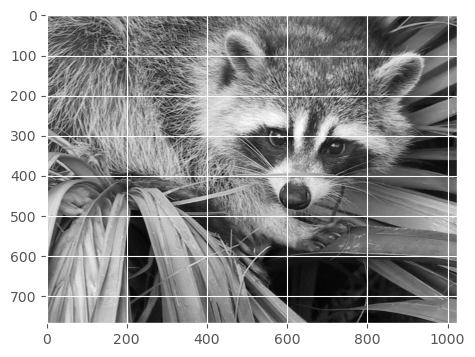

In [148]:
show(face)

**How to negate the image?**

Each value in the array is between 0 to 255. What would we get if we try `255 - face`?

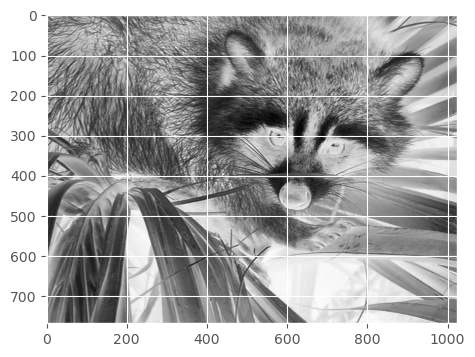

In [149]:
show(255 - face)

**How to get the top-half of the face?**

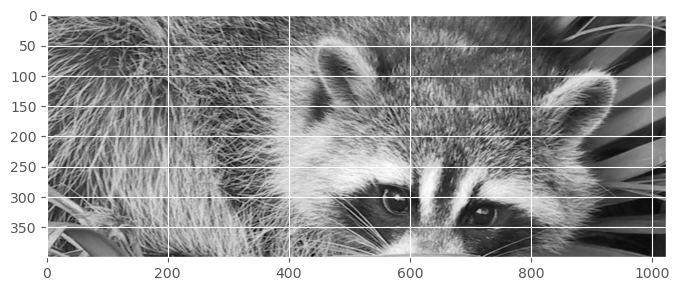

In [150]:
show(face[:400, :]) # a bit more than half, just lazy to compute height/2

**How to get the bottom half?**

**How to get the left half?**

**How to get the right half**

**Skip 100 pixels on all sides**

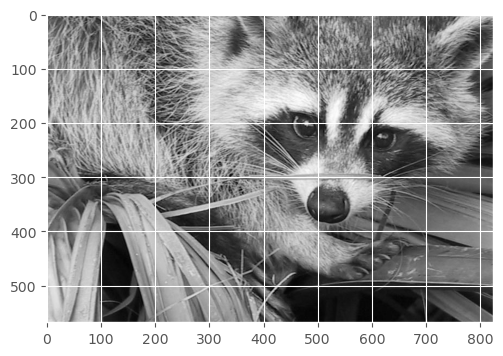

In [151]:
show(face[100:-100, 100:-100])

**Add 10px border**

We'll just replace the 10 pixels on all sides with black.

In [152]:
face1 = face.copy() # make a copy because we are modifying it

In [157]:
face1[:10, :] = 0
face1[-10:, :] = 0
face1[:, :10] = 0
face1[:, -10:] = 0

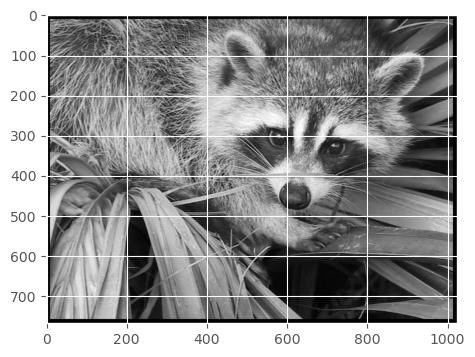

In [158]:
show(face1)

Can you try adding a 10px outer border with black color and another 10 px inner border with white color?

In [162]:
def add_border(image, width, color):
    w = width
    image[:w, :] = color
    image[-w:, :] = color
    image[:, :w] = color
    image[:, -w:] = color 

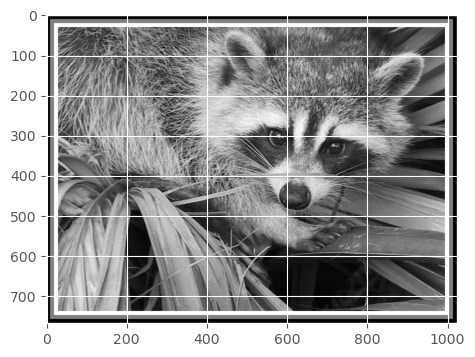

In [164]:
face1 = face.copy()
add_border(face1, 30, 255)
add_border(face1, 20, 128)
add_border(face1, 10, 0)
add_border(face1, 10, 0)

show(face1)

**Make the image sharp**

Turn all colors less than 200 to 0.

In [165]:
face1 = face.copy()

In [166]:
face1[face1 < 200] = 0

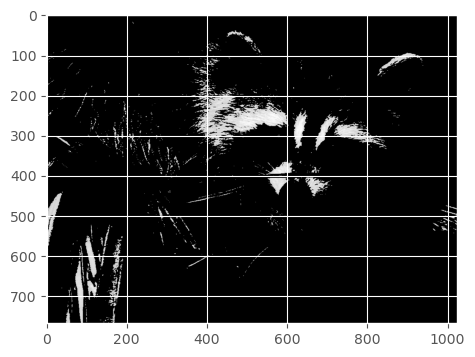

In [167]:
show(face1)

In [168]:
from ipywidgets import interact, IntSlider

In [176]:
def sharpen(n):
    face1 = face.copy()
    face1[face1 < n] =  0
    show(face1)

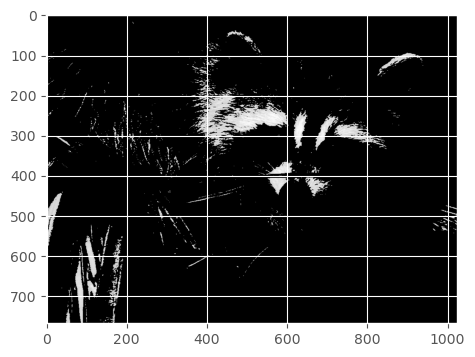

In [177]:
sharpen(200)

In [179]:
interact(sharpen, n=IntSlider(value=100, min=0, max=255))

interactive(children=(IntSlider(value=100, description='n', max=255), Output()), _dom_classes=('widget-interac…

<function __main__.sharpen(n)>

(array([ 55886.,  61750.,  84167., 112754., 127645., 119790., 104124.,
         80793.,  34539.,   4984.]),
 array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200., 225., 250.]),
 <BarContainer object of 10 artists>)

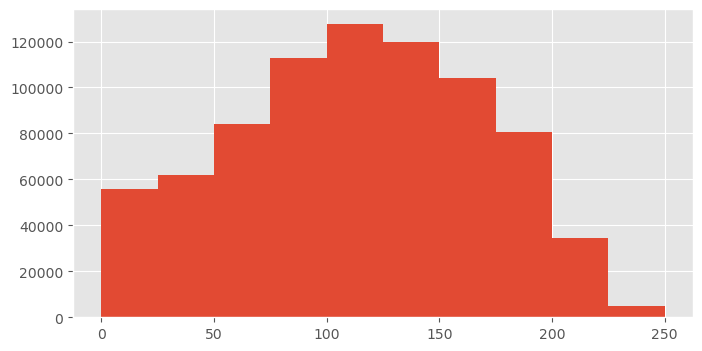

In [181]:
plt.hist(face.reshape(-1))

Makeing an image brighter.

In [182]:
face1 = face.copy()

In [187]:
face1[face1 < 200] = (face1[face1<200] * 1.2).astype(np.uint8)

(array([ 43087.,  55363.,  58881.,  80979., 102021., 101871., 102230.,
         90123., 110855.,  41022.]),
 array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200., 225., 250.]),
 <BarContainer object of 10 artists>)

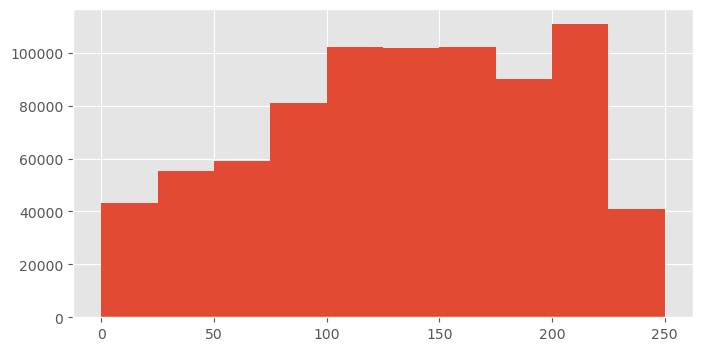

In [188]:
plt.hist(face1.reshape(-1))

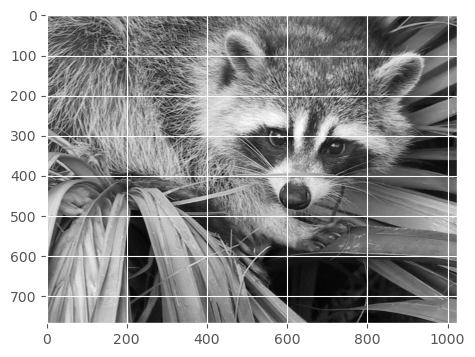

In [190]:
show(face)

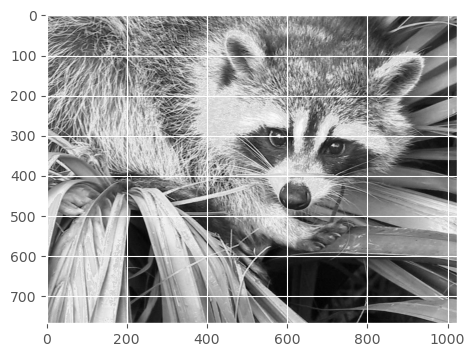

In [189]:
show(face1)

## Introdution to Pandas

In [191]:
import pandas as pd

Pandas as two main classes. `Series` and `DataFrame`.

In [192]:
x = pd.Series([3, 4, 5, 6])

In [194]:
x

0    3
1    4
2    5
3    6
dtype: int64

In [196]:
x = pd.Series([3, 4, 5, 6], index=['a', 'b', 'c', 'd'])

In [197]:
x

a    3
b    4
c    5
d    6
dtype: int64

In [198]:
x[0]

/tmp/ipykernel_2493311/3629782281.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x[0]


3

In [199]:
x['a']

3

In [200]:
x + 1

a    4
b    5
c    6
d    7
dtype: int64

In [201]:
x.dtype

dtype('int64')

In [202]:
x.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [203]:
x > 4

a    False
b    False
c     True
d     True
dtype: bool

In [204]:
x[x>4]

c    5
d    6
dtype: int64

In [206]:
data = [
    [1, 1],
    [2, 4],
    [3, 9],
    [4, 16]]

In [207]:
df = pd.DataFrame(data, columns=["x", "y"], index=["a", "b", "c", "d"])

In [208]:
df

,x,y
a,1,1
b,2,4
c,3,9
d,4,16


In [209]:
df.x

a    1
b    2
c    3
d    4
Name: x, dtype: int64

In [210]:
df.y

a     1
b     4
c     9
d    16
Name: y, dtype: int64

In [211]:
df["x"]

a    1
b    2
c    3
d    4
Name: x, dtype: int64

#### Example: UN Dataset

In [213]:
df = pd.read_csv("data/un-min.csv")

In [214]:
df

,country,region,lifeMale,lifeFemale,infantMortality,GDPperCapita
0,Afghanistan,Asia,45.0,46.0,154,2848
1,Albania,Europe,68.0,74.0,32,863
2,Algeria,Africa,67.5,70.3,44,1531
3,Angola,Africa,44.9,48.1,124,355
4,Argentina,America,69.6,76.8,22,8055
...,...,...,...,...,...,...
183,Viet.Nam,Asia,64.9,69.6,37,270
184,Yemen,Asia,57.4,58.4,80,732
185,Yugoslavia,Europe,69.8,75.3,19,1487
186,Zambia,Africa,42.2,43.7,103,382


In [215]:
df.set_index("country", inplace=True)

In [216]:
df.head()

,region,lifeMale,lifeFemale,infantMortality,GDPperCapita
country,,,,,
Afghanistan,Asia,45.0,46.0,154,2848
Albania,Europe,68.0,74.0,32,863
Algeria,Africa,67.5,70.3,44,1531
Angola,Africa,44.9,48.1,124,355
Argentina,America,69.6,76.8,22,8055


How many countries has infantMortality more than 100?

In [217]:
df.infantMortality > 100

country
Afghanistan     True
Albania        False
Algeria        False
Angola          True
Argentina      False
               ...  
Viet.Nam       False
Yemen          False
Yugoslavia     False
Zambia          True
Zimbabwe       False
Name: infantMortality, Length: 188, dtype: bool

In [218]:
(df.infantMortality > 100).sum()

22

In [219]:
(df.infantMortality > 100).value_counts()

infantMortality
False    166
True      22
Name: count, dtype: int64

<Axes: xlabel='GDPperCapita', ylabel='infantMortality'>

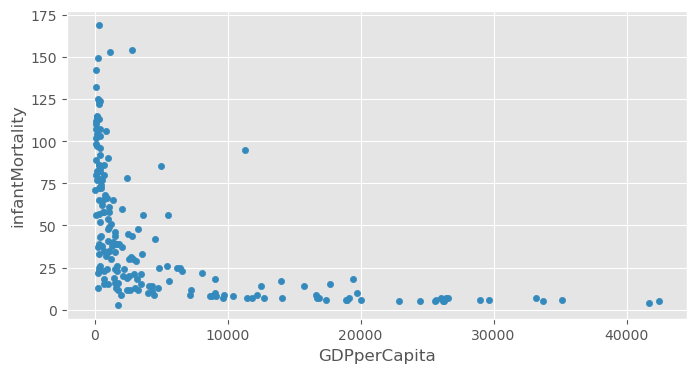

In [220]:
df.plot(kind="scatter", x="GDPperCapita", y="infantMortality")

How to plot this graph only for Asia?

In [221]:
df.region == "Asia"

country
Afghanistan     True
Albania        False
Algeria        False
Angola         False
Argentina      False
               ...  
Viet.Nam        True
Yemen           True
Yugoslavia     False
Zambia         False
Zimbabwe       False
Name: region, Length: 188, dtype: bool

<Axes: xlabel='GDPperCapita', ylabel='infantMortality'>

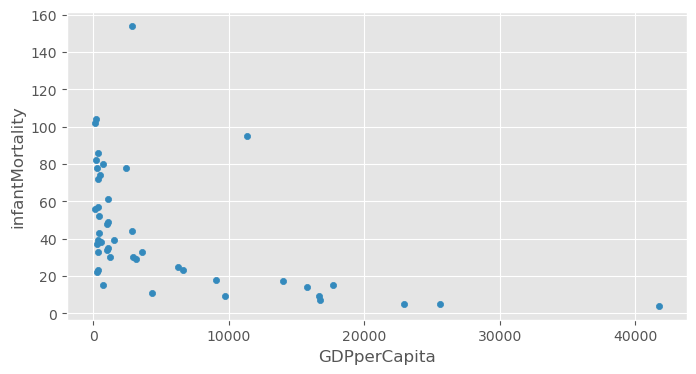

In [223]:
df[df.region == "Asia"].plot(kind="scatter", x="GDPperCapita", y="infantMortality")

<Axes: xlabel='GDPperCapita', ylabel='infantMortality'>

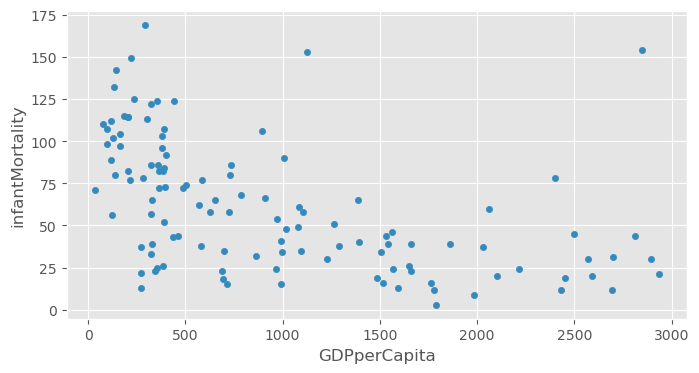

In [224]:
df[df.GDPperCapita < 3000].plot(kind="scatter", x="GDPperCapita", y="infantMortality")